<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Morsali

**Student ID**: 400101956


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

# 1)
To derive the dual optimization problem for the Soft-Margin SVM, let's start with the given primal optimization problem:

\begin{equation*}
\begin{aligned}
& \min_{w,b,\xi} & & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.} & & y_i (w^T x_i + b) \geq 1 - \xi_i, \quad i = 1, \ldots, N \\
& & & \xi_i \geq 0, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}

### Step 1: Formulating the Lagrangian

We introduce Lagrange multipliers $\alpha_i \geq 0$ for the constraints $ y_i (w^T x_i + b) \geq 1 - \xi_i $ and $\mu_i \geq 0$ for the constraints $\xi_i \geq 0 $.

The Lagrangian is:
\begin{equation*}
\begin{aligned}
L(w, b, \xi, \alpha, \mu) = & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N} \xi_i \\
& - \sum_{i=1}^{N} \alpha_i [y_i (w^T x_i + b) - 1 + \xi_i] \\
& - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}
\end{equation*}


### Step 2: Solving for the Partial Derivatives

To find the dual, we take the partial derivatives of $L$ with respect to $w$, $b$, and $\xi_i$, and set them to zero.

#### Partial derivative with respect to $ w $:

\begin{equation*}
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0
\end{equation*}

\begin{equation*}
w = \sum_{i=1}^{N} \alpha_i y_i x_i
\end{equation*}

#### Partial derivative with respect to $b$:

\begin{equation*}
\frac{\partial L}{\partial b} = - \sum_{i=1}^{N} \alpha_i y_i = 0
\end{equation*}

\begin{equation*}
\sum_{i=1}^{N} \alpha_i y_i = 0
\end{equation*}

#### Partial derivative with respect to $\xi_i$:

\begin{equation*}
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0
\end{equation*}

Since $\mu_i \geq 0$ and $\xi_i \geq 0$, we get:
\begin{equation*}
\alpha_i \leq C
\end{equation*}

### Step 3: Substituting back into the Lagrangian

Substitute $w$ and $\xi_i$ back into the Lagrangian to express it in terms of $\alpha_i$.

\begin{equation*}
\begin{aligned}
L(w, b, \xi, \alpha, \mu) = & \frac{1}{2} \| \sum_{i=1}^{N} \alpha_i y_i x_i \|^2 + C \sum_{i=1}^{N} \xi_i \\
& - \sum_{i=1}^{N} \alpha_i \left[ y_i \left( \sum_{j=1}^{N} \alpha_j y_j x_j \right)^T x_i + b - 1 + \xi_i \right] \\
& - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}
\end{equation*}

### Step 4: Simplifying the Dual Problem

By simplifying, we obtain the dual formulation:
\begin{equation*}
\begin{aligned}
\max_{\alpha} & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{s.t.} & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}

### Summary of the Dual Problem

The dual optimization problem for the Soft-Margin SVM is:

\begin{equation*}
\begin{aligned}
\max_{\alpha} & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{s.t.} & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}

Here, $\alpha_i$ are the dual variables associated with the constraints in the primal problem. This dual formulation is a quadratic programming problem that can be efficiently solved using various optimization techniques.


# 2)
To calculate the weights $ w $ and bias $ b $ using the optimum points from the dual problem, we follow these steps:

### 1. Solving the Dual Problem

First, we solve the dual optimization problem to find the optimal Lagrange multipliers $ \alpha_i^* $:

\begin{equation*}
\begin{aligned}
\max_{\alpha} & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{s.t.} & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}

### 2. Calculating the Weight Vector $ w $

Once we have the optimal $ \alpha_i^* $, we can calculate the weight vector $ w $ using the following equation:

\begin{equation*}
w = \sum_{i=1}^{N} \alpha_i^* y_i x_i
\end{equation*}

This is derived from the partial derivative of the Lagrangian with respect to $ w $:

\begin{equation*}
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^{N} \alpha_i y_i x_i
\end{equation*}

### 3. Calculating the Bias Term $ b $

To find the bias $ b $, we use the KKT (Karush-Kuhn-Tucker) conditions. For the support vectors, which are the data points where $ 0 < \alpha_i^* < C $, the corresponding KKT condition is:

\begin{equation*}
y_i (w^T x_i + b) = 1 - \xi_i
\end{equation*}

Since $ \xi_i $ is zero for the support vectors that lie exactly on the margin (i.e., $ y_i (w^T x_i + b) = 1 $), we can select any support vector $x_i $ with $ 0 < \alpha_i^* < C $ and solve for $ b $:

\begin{equation*}
b = y_i - w^T x_i
\end{equation*}

However, to improve numerical stability, we typically average over all such support vectors:

\begin{equation*}
b = \frac{1}{|S|} \sum_{i \in S} \left( y_i - w^T x_i \right)
\end{equation*}

where $ S $ is the set of indices of the support vectors.

### Summary

1. **Solve the dual problem** to get the optimal $\alpha_i^* $.
2. **Calculate the weight vector** $ w $ using:

   
   $
   w = \sum_{i=1}^{N} \alpha_i^* y_i x_i
   $

3. **Calculate the bias term** $ b $ using:
   $
   b = \frac{1}{|S|} \sum_{i \in S} \left( y_i - w^T x_i \right)
   $
   where $ S $ is the set of support vectors.

By following these steps, we can determine the weights $ w $ and bias $ b $ for the SVM from the solution to the dual optimization problem.

# 3)
To classify new data points using the optimal weights ($w$) and bias ($b$) obtained from the Support Vector Machine (SVM) training process, follow these steps:

1. **Compute the Decision Function**: For a new data point $x_{\text{new}}$, calculate the decision function $f(x_{\text{new}})$ using the optimal weights and bias. The decision function is given by:
   
   $f(x_{\text{new}}) = w^T x_{\text{new}} + b$
   

2. **Determine the Class Label**: The class label for the new data point is determined based on the sign of the decision function:
   - If $f(x_{\text{new}}) \geq 0$, classify $x_{\text{new}}$ as belonging to the positive class (typically labeled as +1).
   - If $f(x_{\text{new}}) < 0$, classify $x_{\text{new}}$ as belonging to the negative class (typically labeled as -1).

### Example:
Assume we have the optimal weights $w = [w_1, w_2, \ldots, w_d]$ and bias $b$ from the training process. For a new data point $x_{\text{new}} = [x_1, x_2, \ldots, x_d]$:

1. **Calculate the decision function**:
   
   $f(x_{\text{new}}) = w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_d \cdot x_d + b $
   

2. **Classify the new data point**:
   - If $f(x_{\text{new}}) \geq 0$, then $x_{\text{new}}$ is classified as +1.
   - If $f(x_{\text{new}}) < 0$, then $x_{\text{new}}$ is classified as -1.

This process utilizes the decision boundary defined by the SVM to classify new instances, leveraging the margin maximized during training.

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [45]:
## YOUR CODE HERE
# Define a function to load and display data
def load_and_display_data(file_path):
    df = pd.read_csv(file_path)
    display(df.head())
    return df.values

# Use a list to store the file paths
file_paths = ['DF1.csv', 'DF2.csv', 'DF3.csv']

# Use a list comprehension to load and display data
df1, df2, df3 = [load_and_display_data(file_path) for file_path in file_paths]

,x1,x2,y
0,6.462652,5.121478,-1
1,-6.586541,-7.721287,1
2,9.239683,-8.595738,-1
3,4.250052,2.143755,1
4,8.219779,-3.609733,-1


,x1,x2,y
0,2.937145,77.102291,1
1,-0.029344,44.802353,1
2,5.868818,44.595757,-1
3,8.609281,49.223945,-1
4,7.763276,-14.340750,-1


,x1,x2,y
0,-0.517768,-0.466158,-1
1,0.940985,0.235175,1
2,-0.470720,0.917120,1
3,0.712716,-0.097401,-1
4,-0.608773,-0.107034,-1


Use the following function to visualize the datapoints for all datasets.

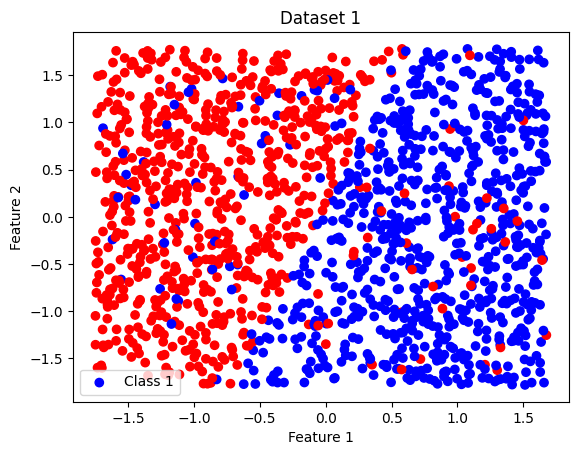

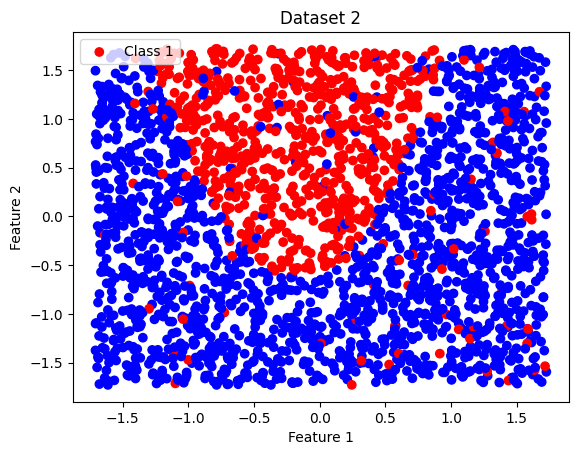

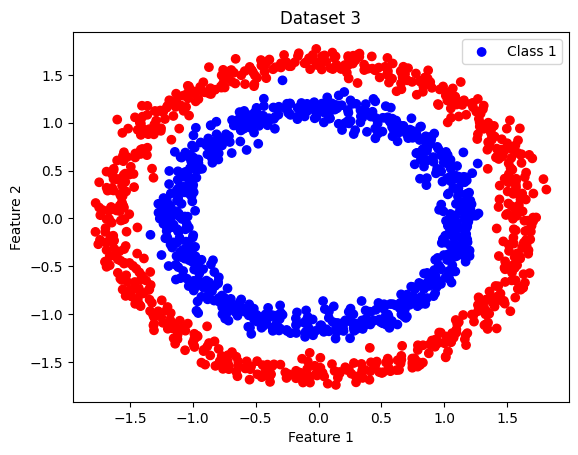

In [46]:

# Define the function to visualize data
def visualize_data(X, y, title):
    col = ['red' if label == 1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(['Class 1', 'Class 2'])
    plt.show()

# Define a function to load and display data
def load_and_display_data(file_path):
    df = pd.read_csv(file_path)
    # display(df.head())

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(df.iloc[:, :-1].values)

    return X, df.iloc[:, -1].values  # assuming the last column is the target variable

# Use a list to store the file paths
file_paths = ['DF1.csv', 'DF2.csv', 'DF3.csv']

# Use a list comprehension to load, display, and visualize data
datasets = [load_and_display_data(file_path) for file_path in file_paths]

for i, (X, y) in enumerate(datasets):
    visualize_data(X, y, title=f'Dataset {i+1}')

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

### Which Kernel to Use for Each Dataset

Based on the provided datasets (Dataset1, Dataset2, and Dataset3), we need to choose appropriate kernels for the Support Vector Machine (SVM) to achieve optimal classification performance.

#### Dataset1: Linearly Separable Data

- **Observation**: The data points in Dataset1 are clearly linearly separable, with a distinct boundary between the two classes.
- **Kernel Choice**: Linear Kernel.
  - **Justification**: Since the data are linearly separable, a linear kernel will suffice to create an optimal hyperplane that separates the classes. Using a linear kernel is computationally efficient and straightforward for linearly separable data.

#### Dataset2: Gaussian Distribution

- **Observation**: The data points in Dataset2 appear to follow a Gaussian distribution, with overlapping regions that make them not linearly separable.
- **Kernel Choice**: Radial Basis Function (RBF) Kernel.
  - **Justification**: The RBF kernel, also known as the Gaussian kernel, is well-suited for handling data with non-linear relationships. By adjusting the sigma parameter ($\sigma$), the RBF kernel can effectively create a non-linear decision boundary that separates the classes. This flexibility allows it to handle the complexity and overlapping regions in Dataset2.

#### Dataset3: Circular Data

- **Observation**: The data points in Dataset3 are arranged in concentric circles with different radii, making them not linearly separable in the original feature space.
- **Kernel Choice**: Polynomial Kernel.
  - **Justification**: A polynomial kernel can map the data into a higher-dimensional space where the concentric circles become separable by a hyperplane. The transformation provided by the polynomial kernel is suitable for datasets with circular or ring-like patterns, as it can effectively capture the non-linear relationships and provide a clear separation between classes.

### Summary

- **Dataset1**: Use a **Linear Kernel** for linearly separable data.
- **Dataset2**: Use an **RBF Kernel** for data with a Gaussian distribution, adjusting the sigma parameter for optimal performance.
- **Dataset3**: Use a **Polynomial Kernel** to handle circular data patterns, transforming them into a space where they become linearly separable.

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [47]:
## YOUR CODE HERE
# Define a function to prepare the data
def prepare_data(data):
    X = data[:, :2]
    y = data[:, 2]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare DF1 data
X1_train, X1_test, y1_train, y1_test = prepare_data(df1)

# Create a column transformer with a standard scaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), slice(0, 2))
    ])

# Apply transformations using Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data, transform the test data
X1_train = pipeline.fit_transform(X1_train)
X1_test = pipeline.transform(X1_test)

# Ensure the same scaling is applied to both training and test sets
scaler = pipeline.named_steps['preprocessor'].named_transformers_['num']


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [48]:
import numpy as np
import cvxpy as cp
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def compute_kernel_matrix(X):
    return np.dot(X, X.T)

def compute_P_matrix(Y, K):
    P = np.multiply(Y, K)
    return 0.5 * (P + P.T)

def solve_optimization_problem(alpha, P, y, C):
    # Ensure that P is positive semi-definite
    P = 0.5 * (P + P.T)  # Make sure P is symmetric
    eigvals = np.linalg.eigvalsh(P)
    if np.any(eigvals < 0):
        P += np.eye(P.shape[0]) * (-np.min(eigvals) + 1e-5)  # Regularize to make positive semi-definite

    # Define the objective function
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P))
    # Define the constraints
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, y)) == 0]
    # Define the problem and solve it
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS, verbose=True)  # Using a different solver for potential performance improvement and enabling verbose mode for detailed output
    return alpha.value

def compute_weights_and_bias(alpha_opt, y, X):
    # Identify support vectors
    support_vectors = alpha_opt > 1e-5
    # Calculate weights
    weights = np.sum((alpha_opt[support_vectors] * y[support_vectors])[:, None] * X[support_vectors], axis=0)
    # Calculate bias
    bias = np.mean(y[support_vectors] - np.dot(X[support_vectors], weights))
    return weights, bias

def fit1(X, y, C):
    n_samples = X.shape[0]
    alpha = cp.Variable(n_samples)
    K = compute_kernel_matrix(X)
    Y = np.outer(y, y)
    P = compute_P_matrix(Y, K)
    alpha_opt = solve_optimization_problem(alpha, P, y, C)
    weights, bias = compute_weights_and_bias(alpha_opt, y, X)
    
    # Print support vector information for debugging and analysis
    support_vector_indices = np.where(alpha_opt > 1e-5)[0]
    print(f"Number of support vectors: {len(support_vector_indices)}")
    print(f"Support vector indices: {support_vector_indices}")
    
    return weights, bias

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def validate_inputs(X, y, C):
    assert isinstance(X, np.ndarray), "X should be a numpy array."
    assert isinstance(y, np.ndarray), "y should be a numpy array."
    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be equal."
    assert C > 0, "C should be a positive value."
    print("Input validation passed.")

def fit1_with_validation_and_scaling(X, y, C, X_test=None):
    validate_inputs(X, y, C)
    
    X_train_scaled, X_test_scaled = scale_features(X, X_test) if X_test is not None else (X, None)
    
    weights, bias = fit1(X_train_scaled, y, C)
    
    return weights, bias, X_test_scaled

# Training the model with DF1 data
C = 10
weights, bias, X1_test_scaled = fit1_with_validation_and_scaling(X1_train, y1_train, C, X1_test)

print("Weights:", weights)
print("Bias:", bias)



Input validation passed.
                                     CVXPY                                     
                                     v1.5.0                                    
(CVXPY) Jun 24 08:58:26 AM: Your problem has 1180 variables, 2361 constraints, and 0 parameters.
(CVXPY) Jun 24 08:58:26 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 24 08:58:26 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 24 08:58:26 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 24 08:58:26 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 24 08:58:26 AM: Compiling prob

Predict the class of each entry in the test set using your learned model.

In [49]:
# Predicting the class of each entry in the test set
def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)

predictions = predict(X1_test_scaled, weights, bias)
print("Predictions:", predictions)

Predictions: [-1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.
  1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.
  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.
  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1. -1. -1.  1. -

Use classification_report function (from sklearn) to get the accuracy of your model.

In [50]:
## YOUR CODE HERE
print(classification_report(y1_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.92      0.93      0.92       148
         1.0       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [51]:
import numpy as np
import cvxpy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define a function to prepare the data
def prepare_data(data):
    X = data[:, :2]
    y = data[:, 2]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare DF2 data
X2_train, X2_test, y2_train, y2_test = prepare_data(df2)

# Create a column transformer with a standard scaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), slice(0, 2))
    ])

# Apply transformations using Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data, transform the test data
X2_train_scaled = pipeline.fit_transform(X2_train)
X2_test_scaled = pipeline.transform(X2_test)



Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [52]:
import numpy as np
import cvxpy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

def rbf_kernel(X, Y, sigma):
    pairwise_sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
    K = np.exp(-pairwise_sq_dists / (2 * sigma**2))
    return K

def compute_P_matrix(Y, K):
    P = np.multiply(Y, K)
    return 0.5 * (P + P.T)

def solve_optimization_problem(alpha, P, y, C):
    # Use psd_wrap to ensure P is treated as PSD
    P = cp.psd_wrap(P)
    # Define the objective function
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P))
    # Define the constraints
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, y)) == 0]
    # Define the problem and solve it
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS, verbose=True)  # Using a different solver for potential performance improvement and enabling verbose mode for detailed output
    return alpha.value

def fit_rbf_kernel(X, y, C, sigma):
    n_samples = X.shape[0]
    alpha = cp.Variable(n_samples)
    K = rbf_kernel(X, X, sigma)
    Y = np.outer(y, y)
    P = compute_P_matrix(Y, K)
    alpha_opt = solve_optimization_problem(alpha, P, y, C)
    
    # Print support vector information for debugging and analysis
    support_vector_indices = np.where(alpha_opt > 1e-5)[0]
    print(f"Number of support vectors: {len(support_vector_indices)}")
    print(f"Support vector indices: {support_vector_indices}")
    
    return alpha_opt, support_vector_indices, K

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def validate_inputs(X, y, C):
    assert isinstance(X, np.ndarray), "X should be a numpy array."
    assert isinstance(y, np.ndarray), "y should be a numpy array."
    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be equal."
    assert C > 0, "C should be a positive value."
    print("Input validation passed.")

def fit_rbf_with_validation_and_scaling(X, y, C, sigma, X_test=None):
    validate_inputs(X, y, C)
    
    X_train_scaled, X_test_scaled = scale_features(X, X_test) if X_test is not None else (X, None)
    
    alpha_opt, support_vector_indices, K = fit_rbf_kernel(X_train_scaled, y, C, sigma)
    
    return alpha_opt, support_vector_indices, K, X_train_scaled, X_test_scaled



def predict(X_train, X_test, alpha_opt, support_vector_indices, y_train, sigma):
    support_vectors = X_train[support_vector_indices]
    alphas = alpha_opt[support_vector_indices]
    y_support = y_train[support_vector_indices]
    K = rbf_kernel(X_test, support_vectors, sigma)
    decision_values = np.dot(K, alphas * y_support)
    return np.sign(decision_values)




# Perform a grid search over C and sigma
C_values = [0.1, 1, 10, 100]
sigma_values = [0.1, 0.5, 1, 5, 10]
best_accuracy = 0
best_params = {'C': None, 'sigma': None}

for C in C_values:
    for sigma in sigma_values:
        alpha_opt, support_vector_indices, K, X2_train_scaled, X2_test_scaled = fit_rbf_with_validation_and_scaling(X2_train, y2_train, C, sigma, X2_test)
        predictions = predict(X2_train_scaled, X2_test_scaled, alpha_opt, support_vector_indices, y2_train, sigma)
        accuracy = np.mean(predictions == y2_test)
        print(f'C={C}, sigma={sigma}, accuracy={accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['C'] = C
            best_params['sigma'] = sigma

print(f'Best parameters: C={best_params["C"]}, sigma={best_params["sigma"]}')
print(f'Best accuracy: {best_accuracy}')

# Train the final model with the best parameters
C = best_params['C']
sigma = best_params['sigma']
alpha_opt, support_vector_indices, K, X2_train_scaled, X2_test_scaled = fit_rbf_with_validation_and_scaling(X2_train, y2_train, C, sigma, X2_test)



Input validation passed.
                                     CVXPY                                     
                                     v1.5.0                                    
(CVXPY) Jun 24 08:58:29 AM: Your problem has 1980 variables, 3961 constraints, and 0 parameters.
(CVXPY) Jun 24 08:58:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 24 08:58:29 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 24 08:58:29 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 24 08:58:29 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 24 08:58:29 AM: Compiling prob

Predict the class of each entry in the test set using your learned model.

In [53]:


predictions = predict(X2_train_scaled, X2_test_scaled, alpha_opt, support_vector_indices, y2_train, sigma)
print("Predictions:", predictions)

Predictions: [-1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -

Use classification_report function (from sklearn) to get the accuracy of your model.

In [54]:
## YOUR CODE HERE
print(classification_report(y2_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95       336
         1.0       0.89      0.90      0.90       160

    accuracy                           0.93       496
   macro avg       0.92      0.92      0.92       496
weighted avg       0.93      0.93      0.93       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [55]:
## YOUR CODE HERE
import numpy as np
import cvxpy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define a function to prepare the data
def prepare_data(data):
    X = data[:, :2]
    y = data[:, 2]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare DF2 data
X3_train, X3_test, y3_train, y3_test = prepare_data(df3)

# Create a column transformer with a standard scaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), slice(0, 2))
    ])

# Apply transformations using Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data, transform the test data
X3_train_scaled = pipeline.fit_transform(X3_train)
X3_test_scaled = pipeline.transform(X3_test)



Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [79]:
from sklearn.model_selection import KFold

def calculate_gram_matrix(X):
    """Calculate the Gram matrix."""
    gram_matrix = (np.dot(X, X.T) + 1) ** 2
    return 0.5 * (gram_matrix + gram_matrix.T)

def define_problem(gram_matrix, y, C):
    """Define the SVM optimization problem."""
    num_samples = len(y)
    lagrange_multipliers = cp.Variable(num_samples)
    P = cp.multiply(np.outer(y, y), gram_matrix)
    P = 0.5 * (P + P.T)
    P = cp.atoms.affine.wraps.psd_wrap(P)
    objective_function = cp.Maximize(cp.sum(lagrange_multipliers) - 0.5 * cp.quad_form(lagrange_multipliers, P))
    constraints = [lagrange_multipliers >= 0, lagrange_multipliers <= C, cp.sum(cp.multiply(lagrange_multipliers, y)) == 0]
    return lagrange_multipliers, cp.Problem(objective_function, constraints)

def extract_support_vectors(lagrange_multipliers, threshold=1e-5):
    """Extract support vectors based on Lagrange multipliers."""
    support_vectors = lagrange_multipliers > threshold
    return np.flatnonzero(support_vectors), support_vectors

def calculate_bias(gram_matrix, support_vectors, optimal_lagrange_multipliers, y):
    """Calculate the bias term."""
    gram_matrix_sv = gram_matrix[support_vectors][:, support_vectors]
    alpha_y_sv = optimal_lagrange_multipliers[support_vectors] * y[support_vectors]
    return np.mean(y[support_vectors] - np.dot(gram_matrix_sv, alpha_y_sv))

def fit_svm(X, y, C):
    """Fit the SVM model."""
    gram_matrix = calculate_gram_matrix(X)
    lagrange_multipliers, optimization_problem = define_problem(gram_matrix, y, C)
    optimization_result = optimization_problem.solve()
    optimal_lagrange_multipliers = lagrange_multipliers.value
    support_vector_indices, support_vectors = extract_support_vectors(optimal_lagrange_multipliers)
    bias = calculate_bias(gram_matrix, support_vectors, optimal_lagrange_multipliers, y)
    return optimal_lagrange_multipliers, bias

def predict_svm(X_train, y_train, X_test, lagrange_multipliers, bias):
    """Predict the class labels for the test set using the learned SVM model."""
    support_vectors = lagrange_multipliers > 1e-5
    support_vector_indices = np.flatnonzero(support_vectors)
    alpha_y_sv = lagrange_multipliers[support_vectors] * y_train[support_vector_indices]
    
    gram_matrix_test = (np.dot(X_test, X_train.T) + 1) ** 2
    decision_function = np.dot(gram_matrix_test[:, support_vector_indices], alpha_y_sv) + bias
    predictions = np.sign(decision_function)
    
    return predictions
# Example usage




Predict the class of each entry in the test set using your learned model.

Use classification_report function (from sklearn) to get the accuracy of your model.

I will do these two task in one cell

In [81]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X3_train_scaled, y3_train):

  # Define the SVM optimization problem with different C values
  optimal_lagrange_multipliers, bias = fit_svm(X3_train_scaled[train], y3_train[train], C=1.0)

  # Generate predictions
  predictions = predict_svm(X3_train_scaled[train], y3_train[train], X3_train_scaled[test], optimal_lagrange_multipliers, bias)
  
  # Print the predictions
  print(f'Predictions for Fold {fold_no}:', predictions)

  # Generate a classification report
  print(f'Classification Report for Fold {fold_no} : \n',classification_report(y3_train[test], predictions))

  fold_no = fold_no + 1

Predictions for Fold 1: [-1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1.
 -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.
 -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.
 -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1.
  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.
 -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.]
Classification Report for 